# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
import sys
%load_ext autoreload
%autoreload 2
%matplotlib inline
!{sys.executable} -m pip install wandb
!pip -q install ./python

    100% |████████████████████████████████| 1.3MB 10.7MB/s ta 0:00:01    50% |████████████████▏               | 675kB 18.7MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 15.8MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 16.6MB/s a 0:00:01
    100% |████████████████████████████████| 460kB 13.1MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 17.5MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 6.6MB/s eta 0:00:01
    100% |████████████████████████████████| 71kB 12.7MB/s ta 0:00:01
    100% |████████████████████████████████| 256kB 17.0MB/s ta 0:00:01
    100% |████████████████████████████████| 184kB 17.7MB/s ta 0:00:01
  Running setup.py bdist_wheel for watchdog ... done
  Stored in directory: /root/.cache/pip/wheels/61/1d/d0/04cfe495619be2095eb8d89a31c42adb4e42b76495bc8f784c
  Running setup.py bdist_wheel for subprocess32 ... done
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4

load packages

In [2]:
import os
sys.path.append('files')

import torch
from datetime import datetime
def get_time(): return datetime.now().strftime("%Y-%d-%d_%H-%M-%S")
from collections import deque
import matplotlib.pyplot as plt

[autoreload of prompt_toolkit failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/opt/conda/lib/python3.6/site-packages/prompt_toolkit/__init__.py", line 19, in <module>
    from .formatted_text import ANSI, HTML
  File "/opt/conda/lib/python3.6/site-packages/prompt_toolkit/formatted_text/__init_

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
os.listdir('/data/Reacher_Linux_NoVis')

['Reacher.x86', 'Reacher_Data', 'Reacher.x86_64']

In [4]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

#select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

# PROJECT 2: CONTINUOUS CONTROL

### login with wandb

In [7]:
os.popen('wandb login b4325006f2643dff095f0551d0248ae8fcc77064').read()
import wandb

# Actor

![](images/nn_actor.svg)

# Cretic


![](images/nn_critic.svg)


# hyper parameters


 - lr_actor : learning rate of the actor
 - lr_critic : learning rate of the critic 
 - gamma : discount factor
 - weight_decay : L2 weight decay for the critic
 - tau : parameter for soft update of target parameters
 - learn_interval : learning interval 
 - learn_num : Amount of batches which we would like to learn (one after the other)
 - batch_size : number of episodes which we would like to use to train
 - buffer_size : number of episodes from which we can can sample of


In [8]:
import json
with open('hyper_parameters.json') as json_file:
    hyper_parameters = json.load(json_file)

# show the parameters
hyper_parameters

{'random_seed': 1,
 'learn_interval': 8,
 'learn_num': 1,
 'lr_actor': 0.001,
 'lr_critic': 0.001,
 'gamma': 0.99,
 'weight_decay': 0,
 'tau': 0.0015,
 'batch_size': 512,
 'buffer_size': 100000}

# Agent

In [ ]:
from agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, num_agents = 20, **hyper_parameters)

# Add the config to wandb    
wandb.init(config=agent.__dict__,project="udacity_deep-reinforcement-learning_project-2")
wandb.watch(agent.actor_local)
wandb.watch(agent.critic_local)

# Train

In [ ]:
def run_ddpg(n_episodes = 250, max_t=1000, print_every=100, save_every=100, checkpoint_name=f'checkpoint_{get_time()}'):
    
    scores_deque = deque(maxlen=print_every)
    scores = []
    
    # for each episode
    for i_episode in range(1, n_episodes+1):
        
        # start a new episode
        environment_info = env.reset(train_mode=True)[brain_name]
        states = environment_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        
        # for max t steps in the episde
        for t in range(max_t):
            
            # get the actions from the agent, given a state
            actions = agent.action(states)
    
            
            # perform the action & receive the next state, reward and done
            env_info = env.step(actions)[brain_name]           
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
 
            # learn if the critereia are met
            agent.step(t, states, actions, rewards, next_states, dones)
            
            # prepare next state + save results
            states = next_states      
            score += rewards
            
            # if any of the agents is done, we stop :) 
            if np.any(dones):
                break
                
        # store the scores | Log
        mean_score = np.mean(score)
        
        # add to the queue
        scores_deque.append(mean_score)
        scores.append(mean_score)
        
        # show logs
        avg_score = np.mean(scores_deque)
        wandb.log({"Average Score": avg_score, "Mean Score": mean_score})
        
        print(f'\rEpisode {i_episode}\tAverage Score: {np.around(avg_score,3)}, score: {np.around(mean_score,3)}', end="")
        
        
   
        if i_episode % save_every == 0:
            agent.save_agent(f'{checkpoint_name}_{i_episode}')
        

        if i_episode % print_every == 0 or avg_score >= 30:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.around(avg_score,3)}, score: {np.around(mean_score,3)}')
        
        if avg_score >= 31.0:
            print(f'\r\nEnvironment is solved Episode {i_episode}\tAverage Score: {np.around(avg_score,3)}, score: {np.around(mean_score,3)}')
            agent.save_agent(f'{checkpoint_name}_{i_episode}')
            break
            
    return scores

scores = run_ddpg()

Text(0.5,0,'Episode #')

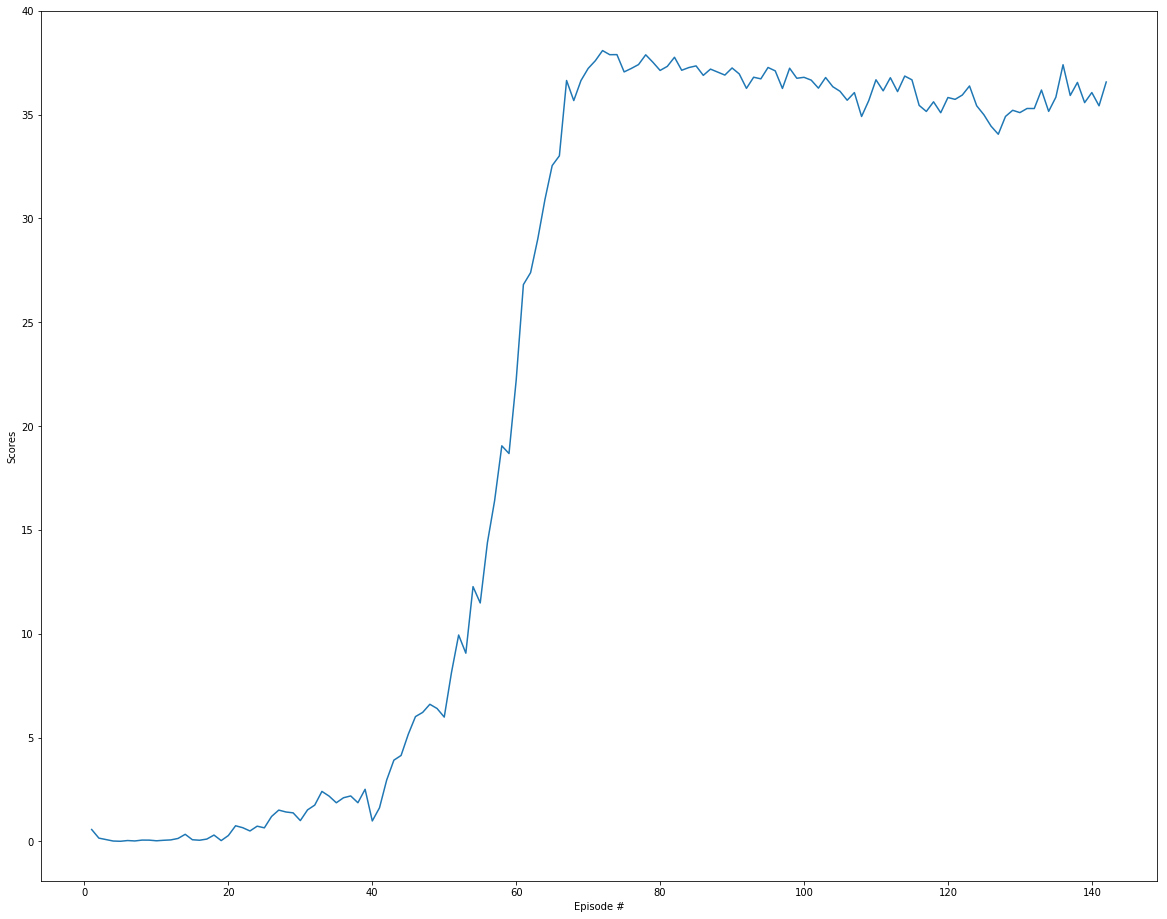

In [11]:
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Scores')
plt.xlabel('Episode #')

![title](images/algorithm.png)